<a href="https://colab.research.google.com/github/Lud-lud/segmentacao_estudantes_clustering_analysis/blob/main/analise_clustering_notas_enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentação de inscritos no Sisu por meio de método de clusterização k-means
Neste projeto, serão utilizados dados do Sisu de 2022 ([Fonte: Base dos Dados](https://basedosdados.org/dataset/8326e3d7-9cd2-4144-863f-c380fefef82c?table=4c60ec40-fadf-433d-98a5-f73e90106f7a)). Foram selecionados todos os inscritos oriundos da cidade de Morrinhos (minha cidade Natal!).


In [124]:
import pandas as pd
import numpy as np

df = pd.read_csv('dados_sisu_2022_morrinhos.csv')

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cpf                          782 non-null    object 
 1   inscricao_enem               782 non-null    object 
 2   candidato                    782 non-null    object 
 3   data_nascimento              782 non-null    object 
 4   sigla_uf_candidato           782 non-null    object 
 5   id_municipio_candidato       782 non-null    int64  
 6   id_municipio_candidato_nome  782 non-null    object 
 7   nota_l                       782 non-null    float64
 8   nota_ch                      782 non-null    float64
 9   nota_cn                      782 non-null    float64
 10  nota_m                       782 non-null    float64
 11  nota_r                       782 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 73.4+ KB


Vamos prosseguir com as análises selecionando apenas os dados quantitativos para utilizar no algoritmo de clusterização.

In [126]:
df_num = df[['nota_ch', 'nota_m', 'nota_r', 'nota_cn', 'nota_l']]
df_num.rename(columns={'nota_ch': 'Ciências Humanas',
                       'nota_m': 'Matemática',
                       'nota_cn': 'Ciências da Natureza',
                       'nota_l': 'Linguagens', 'nota_r': 'Redação'},
              inplace=True)

In [127]:
df_num.describe()

,Ciências Humanas,Matemática,Redação,Ciências da Natureza,Linguagens
count,782.000000,782.000000,782.000000,782.000000,782.000000
mean,552.985166,574.070077,755.473146,520.622762,529.294373
std,90.593001,114.229734,147.576126,92.627702,77.834090
min,352.200000,355.800000,340.000000,344.400000,325.100000
25%,487.900000,479.300000,645.000000,444.500000,478.075000
50%,558.900000,568.400000,760.000000,512.100000,534.600000
75%,621.500000,656.525000,880.000000,585.300000,583.300000
max,745.500000,844.800000,980.000000,735.600000,718.000000


In [128]:
import plotly.express as px

fig = px.scatter_3d(df_num,
                   x='Linguagens',
                   y='Matemática',
                   z='Redação')
fig.show()

Pela análise do gráfico 3D* com apenas 3 das 5 variáveis, observa-se que há um tendência linear positiva (quanto maior a nota de Redação, maior a nota de Linguagens e Matemática).

*Gráfico 3D interativo não visível no arquivo .ipynb no GitHub (para visualizar, abrir o arquivo em ambiente Colab). Veja a versão estática abaixo.

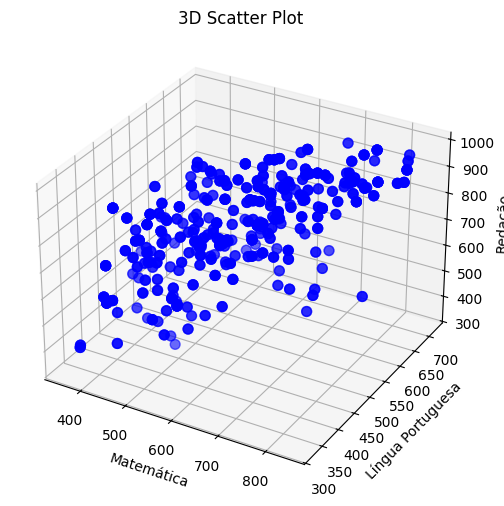

In [129]:
# Dados do gráfico
x = df_num['Matemática']
y = df_num['Linguagens']
z = df_num['Redação']

# Criar o gráfico 3D
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='3d')

# Scatter plot com cores personalizadas
ax.scatter(x, y, z, s=50, c='blue', marker='o')

# Personalizar o gráfico
ax.set_xlabel('Matemática')
ax.set_ylabel('Língua Portuguesa')
ax.set_zlabel('Redação')
plt.title("3D Scatter Plot")

# Salvar e exibir
plt.savefig('3d_scatterplot.png')
plt.show()

In [130]:
# Gráfico de calor (heatmap)

import plotly.graph_objects as go

# Matriz de correlações básica
corr = df_num.corr()

fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.2f}',
        colorscale='viridis'))

fig.update_layout(
    height = 600,
    width = 600)

fig.show()


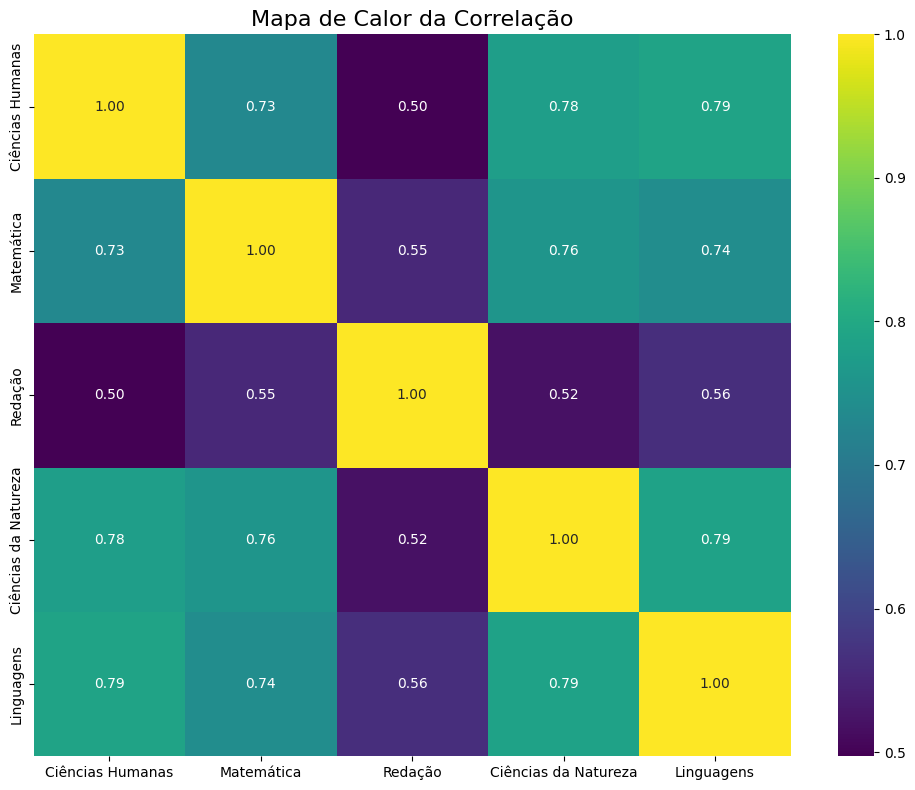

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calcula a matriz de correlação
corr = df_num.corr()

# Configura o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Cria o mapa de calor usando seaborn
sns.heatmap(
    corr,
    annot=True,         # Exibe os valores no mapa de calor
    fmt=".2f",          # Formato dos valores
    cmap="viridis",     # Paleta de cores
    cbar=True           # Adiciona a barra de cores
)

# Adiciona título e ajusta o layout
plt.title("Mapa de Calor da Correlação", fontsize=16)
plt.tight_layout()

# Salva o gráfico como uma imagem estática (opcional)
plt.savefig("heatmap_static.png", dpi=300)

# Mostra o gráfico
plt.show()


De fato, Redação tem uma correlação positiva moderada com Matemática e Redação, assim como com as demais áreas de avaliação. No entanto, observa-se correlações ainda mais fortes entre Linguagens, Matemática, Ciências Humanas e Ciências da Natureza.

In [132]:
# Estatísticas descritivas das variáveis
import pingouin as pg
# Gerando a matriz de correlações de Pearson
matriz_corr = pg.rcorr(df_num, method = 'pearson', upper = 'pval',
                       decimals = 4,
                       pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})

print(matriz_corr)

                     Ciências Humanas Matemática Redação Ciências da Natureza  \
Ciências Humanas                    -        ***     ***                  ***   
Matemática                     0.7315          -     ***                  ***   
Redação                        0.4971     0.5534       -                  ***   
Ciências da Natureza           0.7773     0.7599  0.5193                    -   
Linguagens                     0.7879     0.7408  0.5633               0.7866   

                     Linguagens  
Ciências Humanas            ***  
Matemática                  ***  
Redação                     ***  
Ciências da Natureza        ***  
Linguagens                    -  


Todas as correlações observadas são estatisticamente significantes a 0,05% de nível de significância. A avaliação das correlações é um procedimento indicado para avaliar inicialmente a possibilidade de realização de uma PCA para diminuição da dimensionalidade dos dados. Neste exemplo, como temos apenas 5 variáveis e poucas observações, não realizaremos a PCA, pois não querer perder informações. Caso houvesse um grande número de variáveis e  observações, a realização da PCA é recomendável para reduzir o custo computacional.

Outra observação importante é avaliar se a escala das variáveis é diferente pois, caso seja, é indispensável a realização da padronização, que pode ser feita com o procedimento z-scores, para que a escala não distorça as medidas de distância. Neste projeto, como todas as variáveis a serem utilizadas são notas que variam de 300 a 1000, não é necessário fazer a padronização dos dados.

## Definição do número de clusters

### Método de Elbow

In [133]:
!pip install pingouin

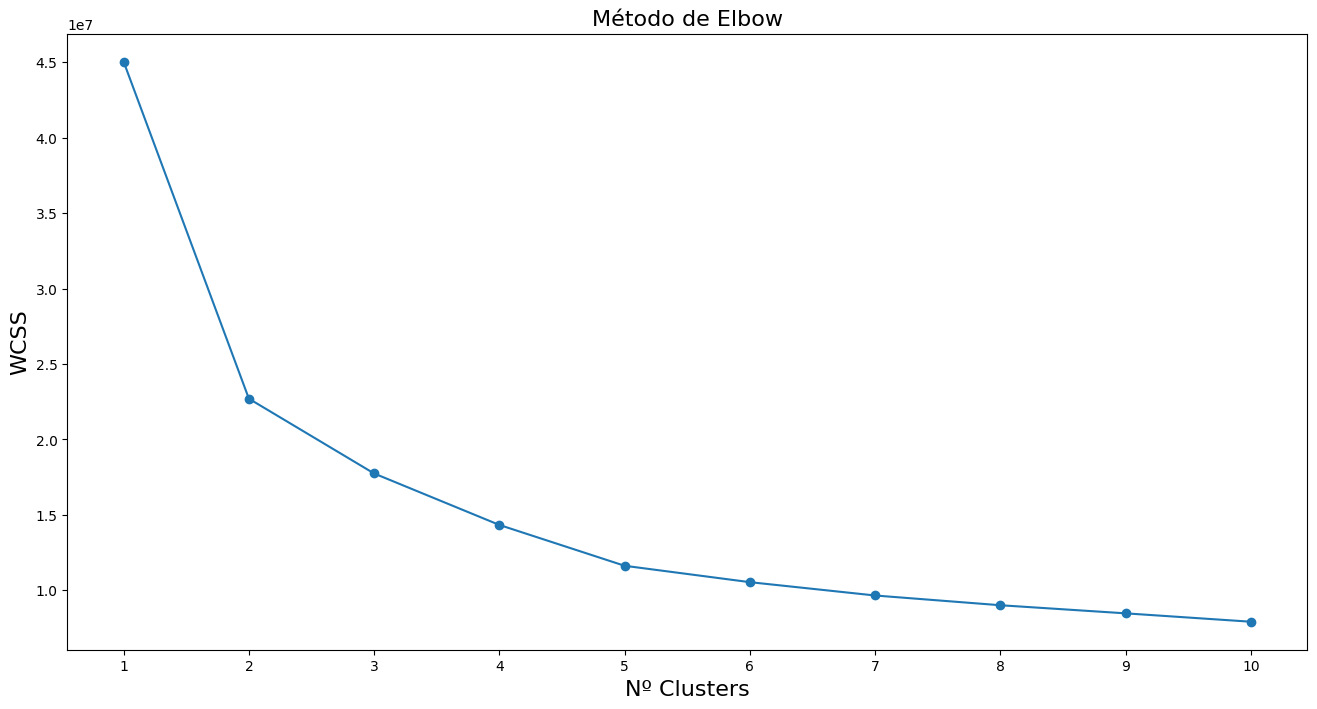

In [134]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

elbow = []
K = range(1,11) # ponto de parada pode ser parametrizado manualmente
for k in K:
    kmeanElbow = KMeans(n_clusters=k, init='random', random_state=100).fit(df_num)
    elbow.append(kmeanElbow.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, elbow, marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.xticks(range(1,11)) # ajustar range
plt.ylabel('WCSS', fontsize=16)
plt.title('Método de Elbow', fontsize=16)
plt.show()

A análise da figura acima, chamado método de Elbow (ou método do cotovelo) mostra que o número ideal de clusters é 2, que é o ponto onde há um ângulo maior. No entanto, também é possível enxergar um leve "cotovelo" quando há 5 clusters.

### Método da Silhueta
Podemos utilizar também o método da Silhueta para avaliar a qualidade da formação de clusters com números distintos de clusters. Quanto maior o valor, menores são as distâncias dentro dos clusters e maiores são as distâncias entre clusters.

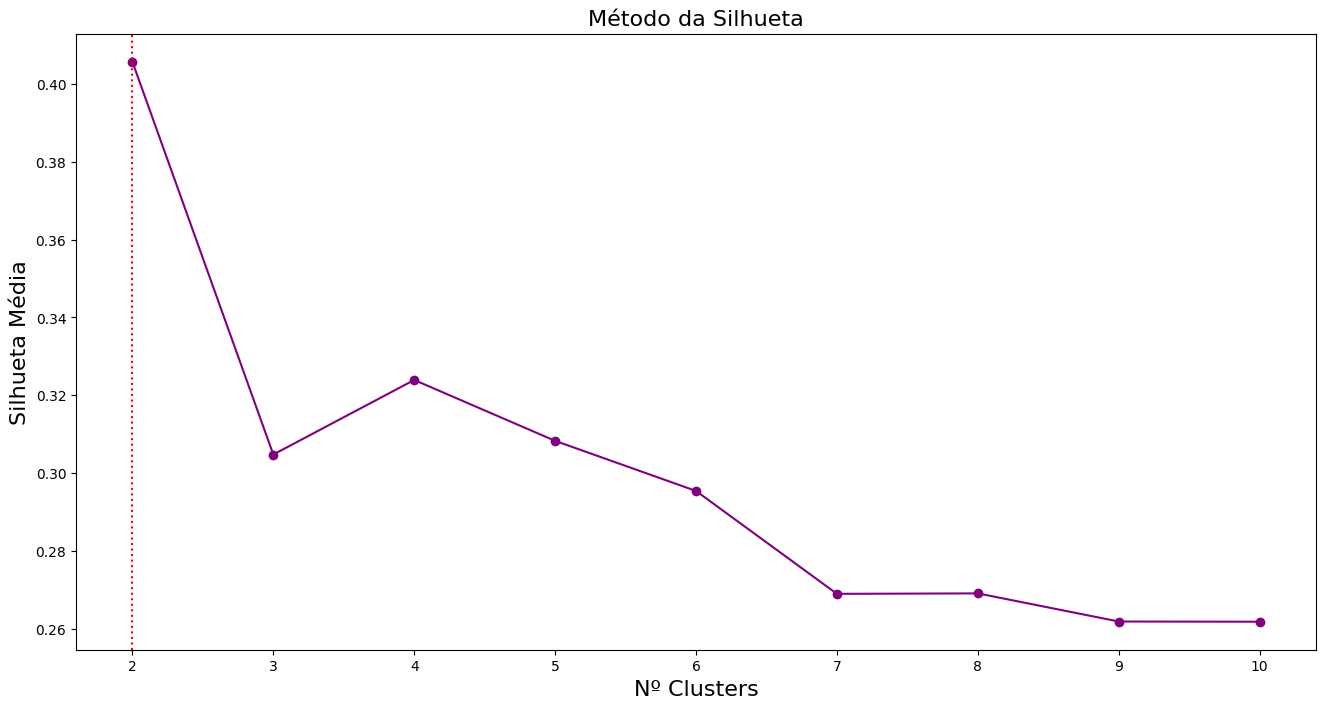

In [135]:
from sklearn.metrics import silhouette_score

silhueta = []
I = range(2,11) # ponto de parada pode ser parametrizado manualmente
for i in I:
    kmeansSil = KMeans(n_clusters=i, init='random', random_state=100).fit(df_num)
    silhueta.append(silhouette_score(df_num, kmeansSil.labels_))

plt.figure(figsize=(16,8))
plt.plot(range(2, 11), silhueta, color = 'purple', marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.ylabel('Silhueta Média', fontsize=16)
plt.title('Método da Silhueta', fontsize=16)
plt.axvline(x = silhueta.index(max(silhueta))+2, linestyle = 'dotted', color = 'red')
plt.show()


A silhueta mostra que com 2 clusters, a qualidade é melhor. Entretanto, quanto menor o número de clusters, mais heterogêneos serão as observações dentro dos clusters. Como o objetivo é maximizar a homogeneidade dentro dos clusters, então é interessante adotar um número maior. A figura sugere que 4 clusters também teria boa qualidade.

### Método hierárquico aglomerativo
Outra forma de definir o número de clusters é realizando uma clusterização por meio do esquema de aglomeração hierárquico.

Isto é bastante útil para quando não se tem uma ideia sobre quantos clusters pode-se obter a partir dos dados.

Neste projeto, vamos testar primeiramente o método de encadeamento médio (Average Linkage ou Between Groups), que se comporta de acordo com a proximidade das observações.

Neste caso, como há algumas observações próximas entre si (conforme visualizado no gráfico 3D), ele irá se comportar como o dendograma feito com o método de encadeamento Complete Linkage ao invés do Single Linkage (o qual é ideal para quando as observações estão mais distantes entre si).

Como medida de distância, vamos utilizar a euclidiana, a mais utilizada para este tipo de análise.

A linha vermelha será traçada onde começam a surgir grandes saltos de distância (a definição é puramente visual).

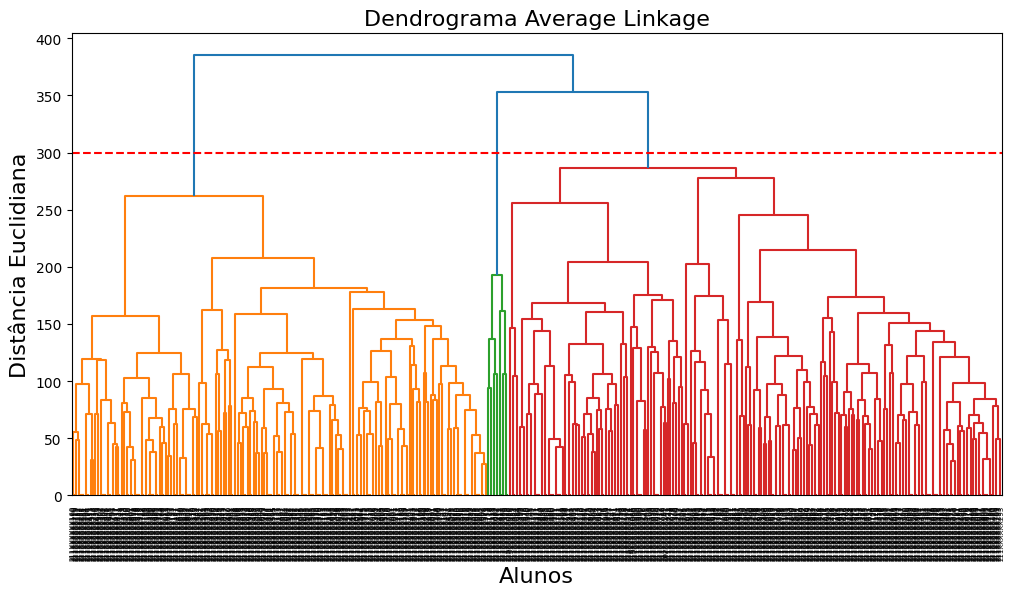

In [136]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12,6))
dend_sing = sch.linkage(df_num, method = 'average', metric = 'euclidean')
dendrogram_s = sch.dendrogram(dend_sing, color_threshold = 300, labels = list(df.inscricao_enem))
plt.title('Dendrograma Average Linkage', fontsize=16)
plt.xlabel('Alunos', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 300, color = 'red', linestyle = '--')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
dend_sing = sch.linkage(df_num, method = 'complete', metric = 'euclidean')
dendrogram_s = sch.dendrogram(dend_sing, color_threshold = 500, labels = list(df.inscricao_enem))
plt.title('Dendrograma Complete Linkage', fontsize=16)
plt.xlabel('Alunos', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 500, color = 'red', linestyle = '--')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
dend_sing = sch.linkage(df_num, method = 'single', metric = 'euclidean')
dendrogram_s = sch.dendrogram(dend_sing, color_threshold = 130, labels = list(df.inscricao_enem))
plt.title('Dendrograma Single Linkage', fontsize=16)
plt.xlabel('Alunos', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 130, color = 'red', linestyle = '--')
plt.show()

Percebe-se que o melhor dendograma é o realizado pelo método de encadeamento Complete Linkage. Defini uma linha que separa as observações em 5 clusters, mas poderia ter passado mais abaixo, o que resultaria em 10 clusters com observações mais homogêneas entre si. Portanto, o critério de escolha sempre será arbitrário e deverá levar em consideração o trade-off entre número de cluster e heterogeneidade dentro dos clusters.

## Clusterização pelo método k-means

In [ ]:
kmeans_final = KMeans(n_clusters = 5, init = 'random', random_state=100).fit(df_num)

# Gerando a variável para identificarmos os clusters gerados

kmeans_clusters = kmeans_final.labels_
df['cluster_kmeans'] = kmeans_clusters

In [ ]:
df.head()

Vamos avaliar quais disciplinas contribuíram para a formação dos grupos por meio do teste estatístico F de análise de variância de um fator (ANOVA one-way), que nos diz se pelo menos 1 cluster é estatisticamente diferente dos demais considerando cada variável.



In [ ]:
import pingouin as pg

p_valor = pd.DataFrame({'Disciplina': df_num.columns, 'p_valor': [None] * len(df_num.columns)})

for i, coluna in enumerate(df_num.columns):
    anova = pg.anova(dv=coluna,
                     between='cluster_kmeans',
                     data=df,
                     detailed=True)
    p_val = anova['p-unc'].iloc[0]  # Seleciona o primeiro valor de p-unc
    p_valor.loc[i, 'p_valor'] = p_val

print(p_valor)


## Caracterização dos clusters

In [ ]:
sns.countplot(x=df["cluster_kmeans"].sort_values().astype(str),
              palette=pal, dodge=False)
plt.title("Número de observações nos clusters")
plt.xlabel("Cluster")
plt.ylabel("Frequência")
plt.show()

In [ ]:
centroides = pd.DataFrame(kmeans_final.cluster_centers_)
centroides.columns = df_num.columns
centroides.index.name = 'cluster'
centroides

In [ ]:
import seaborn as sns
pal = {0: '#ef476f', 1: '#ffd166', 2: '#06d6a0', 3: '#118ab2', 4: '#7b1e7a'}

plt.figure(figsize=(10,10))
sns.scatterplot(x='nota_r', y='nota_m', data=df, hue='cluster_kmeans', palette=pal, s=100)
sns.scatterplot(x='nota_r', y='nota_m', data=centroides, s=40, c='black', label='Centroides', marker="X")
plt.title('Clusters e centroides', fontsize=16)
plt.xlabel('Nota Redação', fontsize=16)
plt.ylabel('Nota Matemática', fontsize=16)
plt.legend(loc='upper left')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Mapear as cores para cada ponto
cores = df["cluster_kmeans"].map(pal)

# Dados do gráfico
x = df['nota_m']
y = df['nota_l']
z = df['nota_r']

# Criar o gráfico 3D
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='3d')

# Scatter plot com cores personalizadas
ax.scatter(x, y, z, s=50, c=cores, marker='o')

# Personalizar o gráfico
ax.set_xlabel('Matemática')
ax.set_ylabel('Língua Portuguesa')
ax.set_zlabel('Redação')
plt.title("3D Scatter Plot")

# Salvar e exibir
plt.savefig('3d_scatterplot.png')
plt.show()


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

pal = {'0': '#ef476f', '1': '#ffd166', '2': '#06d6a0', '3': '#118ab2', '4': '#7b1e7a'}

df_num['cluster_kmeans'] = kmeans_clusters

fig, axes = plt.subplots(1,5, figsize=(14, 4))  # Grade de 5x2 para os subplots
axes = axes.flatten()  # Transforma os eixos em uma lista para iteração

disciplinas = ['Redação',
                'Matemática',
                'Linguagens',
                'Ciências Humanas',
                'Ciências da Natureza']

for i, disciplina in enumerate(disciplinas):
    sns.boxplot(
        x=df_num["cluster_kmeans"],
        y=df_num[disciplina],
        ax=axes[i],
        palette=pal
    )
    axes[i].set_title(disciplina)
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Notas')
    axes[i].set_ylim(300, 1000)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()

Os clusters 0 (vermelho) e 2 (verde) têm pelo menos 50% das observações (dentro das caixinhas) com valores similares para todas as disciplinas, com exceção de Redação, na qual o cluster 0 exibiu notas maiores que o 2.

Os clusters 1 (amarelo) e 3 (azul) também exibiram notas similares em todas as disciplinas, com exceção da Redação, em que o cluster 3 exibiu maiores notas do que o cluster 1.

Já o cluster 4 exibiu notas mais altas em todas as disciplinas.

Para ver os valores exatos dos limites exibidos nos boxplots, confira a tabela abaixo.

In [ ]:
df_num_group = df_num.groupby('cluster_kmeans')
df_num_group.describe().T